In [23]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [24]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
%matplotlib inline

import os
import random
import gc

In [25]:
nrows = 150
ncolumns = 150
channels = 3

In [26]:
modelname = 'RTL_3'

In [27]:
with open('/content/gdrive/My Drive/iss/prumls/data/face_train_data_subset.npy', 'rb') as f:
    train_data = np.load(f)

In [28]:
with open('/content/gdrive/My Drive/iss/prumls/data/face_train_lable_subset.npy', 'rb') as f:
    train_lable = np.load(f)

In [29]:
with open('/content/gdrive/My Drive/iss/prumls/data/face_test_data_subset.npy', 'rb') as f:
    test_data = np.load(f)

In [30]:
with open('/content/gdrive/My Drive/iss/prumls/data/face_test_lable_subset.npy', 'rb') as f:
    test_lable = np.load(f)

In [31]:
num_classes = test_lable.shape[1]

In [32]:
from keras import layers
from keras import models
from keras.applications import InceptionResNetV2
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger,LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [33]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation='softmax'))

In [34]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13824)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 57,876,707
Trainable params: 57,816,163
Non-trainable params: 60,544
_____________________________________

In [35]:
checkpointer = ModelCheckpoint(
    '/InceptionResNetV2.model',
    verbose=2, save_best_only=True)

In [36]:
conv_base.trainable=False

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13824)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 57,876,707
Trainable params: 3,539,971
Non-trainable params: 54,336,736
__________________________________

In [38]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.05),metrics=['accuracy'])

In [39]:
def lrSchedule(epoch):
    lr  = 1e-1
    
    if epoch > 160:
        lr  *= 0.5e-3        
    elif epoch > 140:
        lr  *= 1e-3       
    elif epoch > 120:
        lr  *= 1e-2     
    elif epoch > 80:
        lr  *= 1e-1
        
    print('Learning rate: ', lr)
    return lr

LRScheduler     = LearningRateScheduler(lrSchedule)

                                                                                # Step 2
folderpath      = '/content/gdrive/My Drive/iss/prumls/colab/'
filepath        = folderpath + modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath+modelname +'.csv')                       # Step 2
callbacks_list  = [checkpoint,csv_logger,LRScheduler]                           # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print(callbacks_list[2])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath+modelname+'.csv')

Callbacks created:

Path to model: /content/gdrive/My Drive/iss/prumls/colab/RTL_3.hdf5
Path to log:   /content/gdrive/My Drive/iss/prumls/colab/RTL_3.csv


In [40]:
datagen = ImageDataGenerator(width_shift_range=0.1,                             # Step 1
height_shift_range=0.1,
rotation_range=20,
horizontal_flip=True,
vertical_flip=False)

In [52]:
model.fit_generator(datagen.flow(train_data, train_lable, batch_size=100),                 # Step 2
validation_data=(test_data, test_lable),
epochs=15,
verbose=1,
steps_per_epoch=len(train_data)/10)                                                                                  

Epoch 1/15
 1/43 [..............................] - ETA: 0s - loss: 1.0860 - accuracy: 0.4500

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/gdrive/My Drive/iss/prumls/colab/RTL_2.h5')
model.save_weights('/content/gdrive/My Drive/iss/prumls/colab/RTL_weights_2.h5')

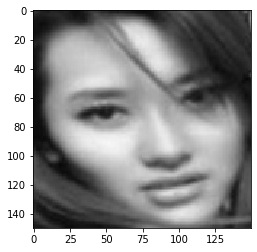

In [24]:
from matplotlib import pyplot as plt
plt.imshow(test_data[0], interpolation='nearest')
plt.show()

In [25]:
np.argmax(test_lable[0])

0

In [ ]:
#model.fit_generator(datagen.flow(train_data, train_lable, batch_size=10),                 # Step 2
#validation_data=(train_data, train_lable),
#epochs=50,
#verbose=1,
#steps_per_epoch=len(train_data)/10,
#callbacks=callbacks_list)                                                                                  

In [ ]:
np.argmax(result)

586177

In [ ]:
outcome = []
confident = []
for i in range(0,len(result)-1): 
    if np.argmax(result[i]) == np.argmax(test_lable[i]):
      outcome.append(1)
    else:
      outcome.append(0)
    confident.append(result[i])


In [ ]:
accuracy = sum(outcome)/len(outcome)

In [ ]:
accuracy

0.006154357950765137

In [ ]:
result[2][151]

0.012043263

In [ ]:
np.argmax(result[2], axis=0)

151

In [ ]:
np.argmax(test_lable[2], axis=0)

0

In [ ]:
np.max(model.predict(np.asarray(test_data)))

1.0

In [ ]:
test_lable

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0